### Exercise 12.2

Change the architecture of your DNN using convolutional layers. Use `Conv2D`, `MaxPooling2D`, `Dropout`, but also do not forget `Flatten`, a standard `Dense` layer and `soft-max` in the end. I have merged step 2 and 3 in the following definition of `create_CNN()` that **<span style="color:red">you should complete</span>**:

In [3]:
import tensorflow as tf
from tensorflow import keras
import numpy as np
import matplotlib.pyplot as plt
seed=0
np.random.seed(seed) # fix random seed
tf.random.set_seed(seed)


# 1: LOAD AND PROCESS DATA


print("1: LOAD AND PROCESS DATA")

from tensorflow.keras.datasets import mnist

img_rows, img_cols = 28, 28 # input image dimensions (pixels) 
num_classes = 10 # output: 10 digits

# the data, split between train and test sets
(X_train, Y_train), (X_test, Y_test) = mnist.load_data()

print('X_train shape:', X_train.shape) # l'input
print('Y_train shape:', Y_train.shape) # label, ovvero gli output
print('X_test shape:', X_test.shape) # l'input
print('Y_test shape:', Y_test.shape) # label, ovvero gli output


# 1.1: REFORMAT DATA
# we need to format the data in the correct shape.

print("1.1: REFORMAT DATA")

# reshape data, depending on Keras backend
if keras.backend.image_data_format() == 'channels_first':
    X_train = X_train.reshape(X_train.shape[0], 1, img_rows, img_cols)
    X_test = X_test.reshape(X_test.shape[0], 1, img_rows, img_cols)
    input_shape = (1, img_rows, img_cols)
else:
    X_train = X_train.reshape(X_train.shape[0], img_rows, img_cols, 1)
    X_test = X_test.reshape(X_test.shape[0], img_rows, img_cols, 1)
    input_shape = (img_rows, img_cols, 1)

print('     Before to_categorical: ')

print('X_train shape: ', X_train.shape)
print('Y_train shape: ', Y_train.shape)

print('Train samples: ', X_train.shape[0])
print('Test samples: ', X_test.shape[0])


# cast floats to single precision, and rescale to interval [0,1]
X_train = X_train.astype('float32')/255
X_test = X_test.astype('float32')/255

# convert class vectors to binary class matrices, e.g. for use with categorical_crossentropy
Y_train = keras.utils.to_categorical(Y_train, num_classes)
Y_test = keras.utils.to_categorical(Y_test, num_classes)
print('     After to_categorical: ')
print('X_train shape:', X_train.shape)
print('Y_train shape:', Y_train.shape)



# 2: DEFINE dNN & ITS ARCHITECTURE

print("2: DEFINE CDNN & ITS ARCHITECTURE")

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPooling2D
                                                        # I need the last 3 for Convolutional Neural Networks
from tensorflow.keras.optimizers import SGD, Adam, RMSprop, Adagrad, Adadelta, Adam, Adamax, Nadam 

opt = 'Adam)'                                    

def create_CDNN():
    model = Sequential()                                # instantiate model
    #----------create layers-------------                                                    
    model.add(Conv2D(10, kernel_size=(5, 5),            # add first convolutional layer with 10 filters (dimensionality of output space)
                     activation='relu',
                     input_shape=input_shape))          # Keras SEquential Model can infer the correct input/output dimensions of other layers
    model.add(Conv2D(100, kernel_size=(5,5), activation='relu'))
    model.add(Dropout(0.5))                             # Dropout, spegne alcuni neuroni, con rate (0.5)
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Flatten())                                # Moving towards a standard flat layer in the final part
    model.add(Dense(23, activation = 'relu'))
    model.add(Dense(num_classes, activation='softmax')) 

    #-------------compile----------------                                                    
    model.compile(loss=keras.losses.categorical_crossentropy, 
                  optimizer=Adadelta(learning_rate=1),        
                  metrics=['acc'])                            
    return model

print('Model created and compiled successfully! Ready to train.')



1: LOAD AND PROCESS DATA
X_train shape: (60000, 28, 28)
Y_train shape: (60000,)
X_test shape: (10000, 28, 28)
Y_test shape: (10000,)

1.1: REFORMAT DATA
     Before to_categorical: 
X_train shape:  (60000, 28, 28, 1)
Y_train shape:  (60000,)
Train samples:  60000
Test samples:  10000
     After to_categorical: 
X_train shape: (60000, 28, 28, 1)
Y_train shape: (60000, 10)

2: DEFINE CDNN & ITS ARCHITECTURE
Model created and compiled successfully! Ready to train.


In [4]:

# 4: MODEL TRAINING

print("4: MODEL TRAINING")

my_batch_size = 32
epochs = 10                                         

model_CDNN = create_CDNN()

# Train CDNN and store training info in history
# Use the `fit()` method of the `Sequential` class
history = model_CDNN.fit(X_train, Y_train,          # input and output data
                        batch_size=my_batch_size,   # optional
                        epochs=epochs,              # optional (but how can it work without?)
                        verbose=1,                  # monitoring training process
                        validation_data=(X_test, Y_test)# optional
                        )


4: MODEL TRAINING
Epoch 1/10


2023-06-05 16:13:37.626782: W tensorflow/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 188160000 exceeds 10% of free system memory.


1875/1875 [==============================] - 110s 59ms/step - loss: 0.1221 - acc: 0.9632 - val_loss: 0.0540 - val_acc: 0.9871
Epoch 2/10
1875/1875 [==============================] - 117s 62ms/step - loss: 0.0440 - acc: 0.9869 - val_loss: 0.0396 - val_acc: 0.9904
Epoch 3/10
1875/1875 [==============================] - 127s 68ms/step - loss: 0.0319 - acc: 0.9903 - val_loss: 0.0366 - val_acc: 0.9907
Epoch 4/10
1875/1875 [==============================] - 120s 64ms/step - loss: 0.0260 - acc: 0.9920 - val_loss: 0.0339 - val_acc: 0.9899
Epoch 5/10
1875/1875 [==============================] - 112s 60ms/step - loss: 0.0218 - acc: 0.9931 - val_loss: 0.0314 - val_acc: 0.9904
Epoch 6/10
1875/1875 [==============================] - 111s 59ms/step - loss: 0.0175 - acc: 0.9946 - val_loss: 0.0283 - val_acc: 0.9917
Epoch 7/10
1875/1875 [==============================] - 110s 59ms/step - loss: 0.0156 - acc: 0.9954 - val_loss: 0.0288 - val_acc: 0.9912
Epoch 8/10
1875/1875 [==============================


5: MODEL PERFORMANCE EVALUATION
313/313 [==============================] - 2s 8ms/step - loss: 0.0308 - acc: 0.9903
Test loss: 0.030765613541007042
Test accuracy: 0.9902999997138977


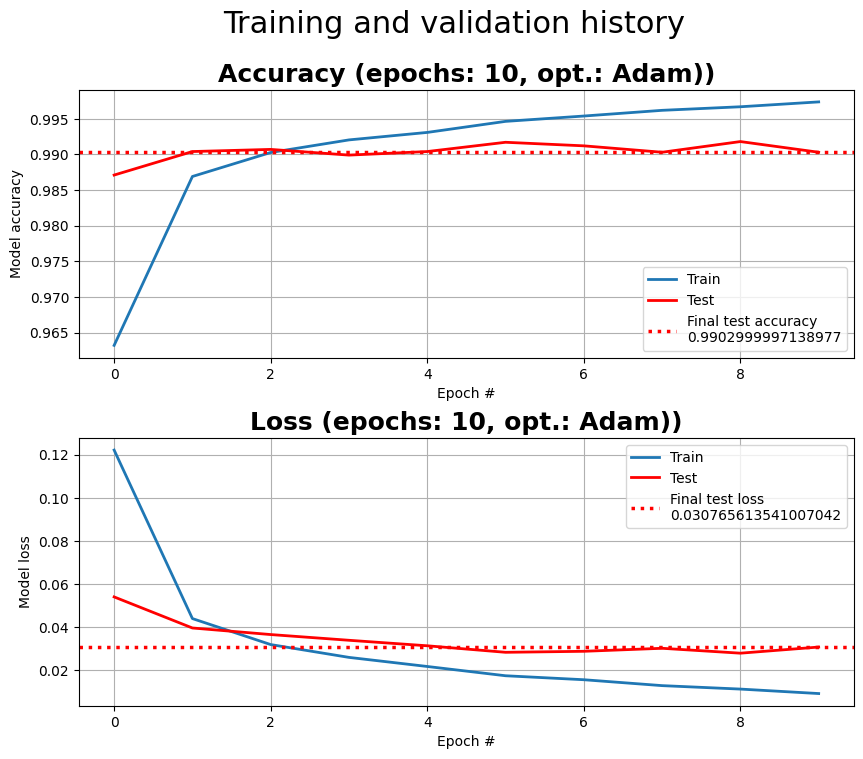


6: MODEL PREDICTIONS
313/313 [==============================] - 2s 8ms/step


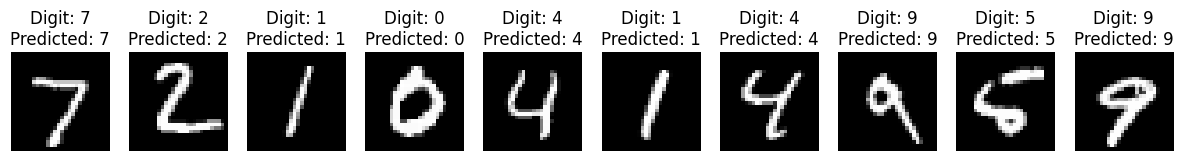

In [9]:

# 5: MODEL PERFORMANCE EVALUATION


print("5: MODEL PERFORMANCE EVALUATION")

score = model_CDNN.evaluate(X_test, Y_test, verbose=1)

# print performance
print('Test loss:', score[0])
print('Test accuracy:', score[1])

# look into training history
# summarize history for accuracy
plt.figure(figsize=(10,8))
plt.suptitle("Training and validation history", fontsize = 22)

plt.subplot(2,1,1)
plt.plot(history.history['acc'], label = 'Train', linewidth = 2)
plt.plot(history.history['val_acc'], label = 'Test', color = 'r', linewidth = 2)
finacc = history.history['val_acc'][epochs-1]
plt.axhline(y=finacc, color = 'r', label = 'Final test accuracy\n'+str(finacc), linestyle =':', linewidth = 2.5)
title = "Accuracy (epochs: "+str(epochs)+", opt.: "+opt+")"
plt.title(title, fontsize = 18, fontweight = "bold")
plt.ylabel('Model accuracy')
plt.xlabel('Epoch #')
plt.legend(loc='best')
plt.grid()

# summarize history for loss
plt.subplot(2,1,2)
plt.plot(history.history['loss'], label = 'Train', linewidth = 2)
plt.plot(history.history['val_loss'],  label = 'Test', color ='r', linewidth = 2)
finacc = history.history['val_loss'][epochs-1]
plt.axhline(y=finacc, color = 'r', label = 'Final test loss\n'+str(finacc), linestyle = ':', linewidth = 2.5)
title = "Loss (epochs: "+str(epochs)+", opt.: "+opt+")"
plt.title(title, fontsize = 18, fontweight = "bold")
plt.ylabel('Model loss')
plt.xlabel('Epoch #')
plt.legend(loc='best')
plt.grid()

plt.subplots_adjust(hspace=0.3)
#plt.savefig(facecolor='white')
plt.show()


# 6: MODEL PREDICTIONS

print("6: MODEL PREDICTIONS")
predictions = model_CDNN.predict(X_test)

x_test = X_test.reshape(X_test.shape[0], img_rows, img_cols,1)

plt.figure(figsize=(15,4))
for i in range(10):    
    ax = plt.subplot(2, 10, i + 1)    
    plt.imshow(x_test[i, :, :, 0], cmap='gray')    
    plt.title("Digit: {}\nPredicted: {}".format(np.argmax(Y_test[i]), np.argmax(predictions[i])))    
    plt.axis('off') 

#plt.savefig('imgs/2/pred'+str(epochs)+opt+'.png', facecolor='w')
plt.show()

In [ ]:
12.3

1/1 [==============================] - 0s 18ms/step


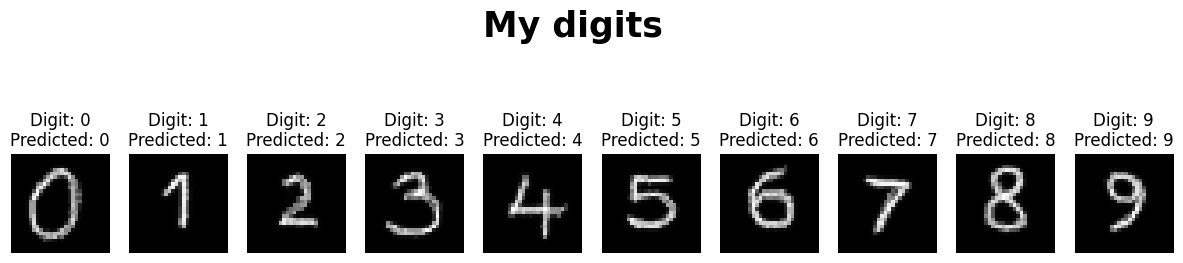

In [12]:
from PIL import Image
import os
import numpy as np
import matplotlib.pyplot as plt

digit_filenames = [ "digits/0.png",
                    "digits/1.png",
                    "digits/2.png",
                    "digits/3.png",
                    "digits/4.png",
                    "digits/5.png",
                    "digits/6.png",
                    "digits/7.png",
                    "digits/8.png",
                    "digits/9.png", ]
data = []

for digit_filename in digit_filenames:
    digit_in = Image.open(digit_filename).convert('L')

    ydim, xdim = digit_in.size
    pix=digit_in.load()
    img = np.zeros((xdim, ydim))
    for j in range(ydim):
        for i in range(xdim):
            img[i,j]=pix[j,i]/255
    data.append(img)

# I use the previously trained CDNN to predict the digit:

predictions = [0,0,0,0,0,0,0,0,0,0]
for i in range(0,10):
    data[i] = data[i].reshape(1,xdim, ydim, 1)
    predictions[i] = model_CDNN.predict(data[i])
    data[i] = data[i].reshape(xdim,ydim)

plt.figure(figsize=(15,4))
plt.suptitle("My digits", fontsize = 25, fontweight = 'bold')
for i in range(10):    
    ax = plt.subplot(1, 10, i + 1)    
    plt.imshow(data[i], cmap='gray')    
    plt.title("Digit: "+str(i)+"\nPredicted: {}".format(np.argmax(predictions[i])))    
    plt.axis('off') 

#plt.savefig('imgs/3/mypred'+str(epochs)+opt+'.png', facecolor='w')
plt.show()